### Importando diretamente as libs pro projeto

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D

### Baixando o dataset

In [4]:
# Baixar o dataset Cats vs Dogs da Microsoft
!wget -c https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip -O kagglecatsanddogs_5340.zip

# Descompactar o arquivo baixado
!unzip -q kagglecatsanddogs_5340.zip -d dataset


--2024-12-07 13:52:03--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.192.208.155, 2600:1409:9800:984::317f, 2600:1409:9800:98c::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.192.208.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  98.7MB/s    in 11s     

2024-12-07 13:52:14 (74.4 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [6]:
# Checando o caminho do dataset
import os

root = "dataset/PetImages"
categories = ["Cat", "Dog"]

for category in categories:
    path = os.path.join(root, category)
    print(f"Categoria {category} contém {len(os.listdir(path))} imagens.")

Categoria Cat contém 12501 imagens.
Categoria Dog contém 12501 imagens.


In [ ]:
# Tratando algumas imagens corrompidas/removendo
import cv2

for category in categories:
    path = os.path.join(root, category)
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        try:
            img = cv2.imread(file_path)
            if img is None:
                print(f"Removendo imagem corrompida: {file_path}")
                os.remove(file_path)
        except Exception as e:
            print(f"Erro ao carregar imagem {file_path}: {e}")
            os.remove(file_path)

In [8]:
# Separando dados entre treinamento/validação
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Geradores para treino e validação
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    root,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training')

validation_generator = datagen.flow_from_directory(
    root,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 19957 images belonging to 2 classes.
Found 4989 images belonging to 2 classes.


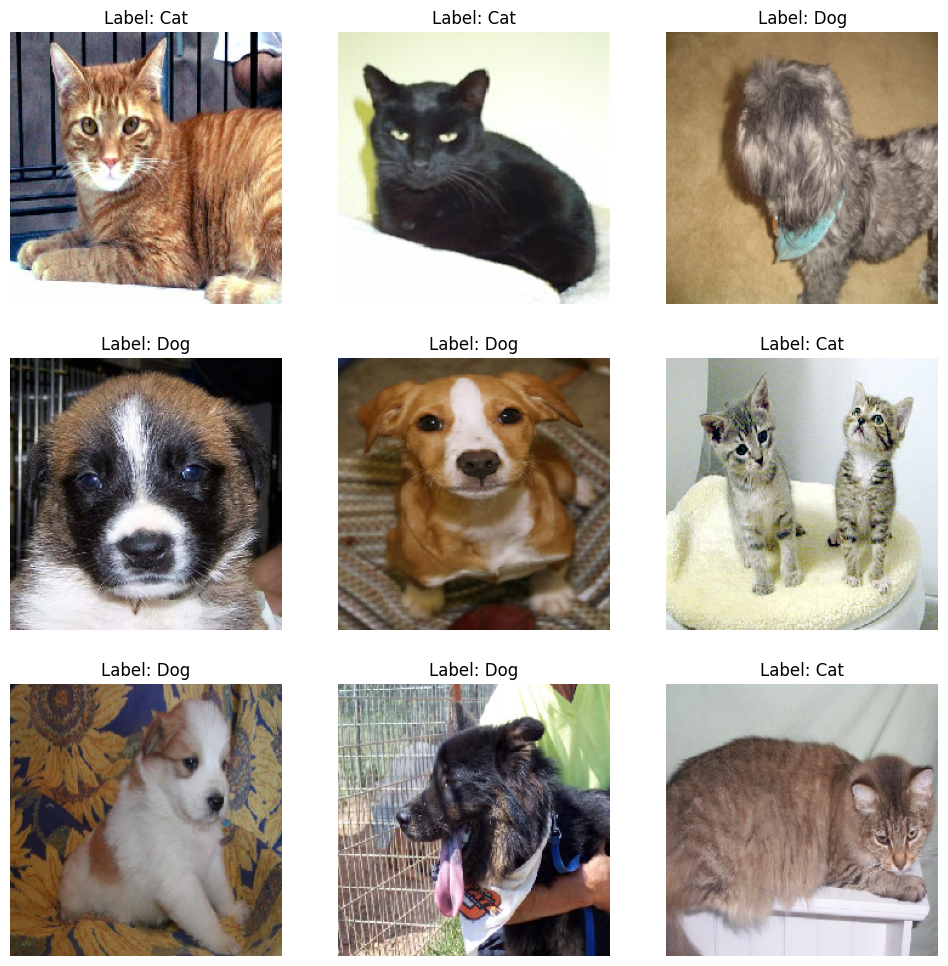

In [9]:
import matplotlib.pyplot as plt
import numpy as np

sample_batch = next(train_generator)
sample_images, sample_labels = sample_batch[0], sample_batch[1]

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"Label: {'Dog' if sample_labels[i] else 'Cat'}")
    plt.axis('off')
plt.show()
